### Binomial Option pricing model assumptions and outline




The option pricing model here starts as a binomial 1 step on a european style option and concludes that the accuracy of the model generally increases with N steps, as N $\to\infty$ (continuous time as approximated in the Black Scholes Merton model). As volatility is the most significant input to any option pricing model, we also conclude that there needs to be a more sophisticated model around estimating future volatility itself and that this model only serves to provide a basic foundation of option pricing.

We will be using daily stock data on Zurich Insurance Group AG (ZURN.SW) from Yahoo Finance (ZURN.SW.csv) and equity option price data from Eurex, in particular we will be looking at the settlement price as of August 13th, 2019 of a Dec '19 340 strike european call option on ZURN since this currently has the largest open interest on this exchange for this underlying. For more details: <https://www.eurexchange.com/exchange-en/products/equ/opt/56498!quotesSingleViewOption?callPut=Call&maturityDate=201912>

Later, we will extend the model to derive the price on equivalent put options. Before we begin introducing the data, let's state some assumptions for the model inputs:

* The model will assume underlying stock prices are lognormally distributed and hence stock price returns are normally distributed.

* There is a risk-free rate, $\text{r}$, which is constant throughout the time period until expiry. For the purposes of this example and simplicity the risk-free rate used is the current SNB policy rate of $\text{-0.75%}$.

* Start date for the time period is August 13, 2019 and the end date is option expiration December 20, 2019. Hence time to expiration in trading days is roughly $\text{t} = 92$. Total trading days in the year are assumed to be 252.

* Initial stock price $S_0$ is the closing price on August 13, 2019.

* Annual volatility $\sigma$ of stock prices determined by 1 year historical data from Yahoo finance (derived later).

* Dividends ($\text{q}$): for this option, there is no dividend to be paid before expiration date.

* Strike price $\text{X}$ is 340.

* The extent of an 'up-move' ($\text{U}$) or increase in price and a 'down-move' ($\text{D}$) or decrease in price is a function of volatility and time to expiration ($\text{t}$): $U = e^{\sigma\sqrt{t}}$, $D = \frac{1}{U}$

* The probability of $\text{U}$ denoted as $Pr_{(U)}$ is determined by $\text{U}$, $\text{D}$, $\text{r}$ and $\text{t}$ and the probability of $\text{D}$ denoted as $Pr_{(D)}$ is equal to $1-Pr_{(U)}$

$Pr_{(U)} = \frac{e^{(r-q)t} - D}{U-D}$
    
* The ending stock price following an up-move path is $S_U = S_0 \times U$

* The ending stock price following a down-move path is $S_D = S_0 \times D$


### Deriving annual volatility using past 1 year historical closing prices

We have historical closing prices downloaded from Yahoo finance for ZURN.SW in csv format (ZURN.SW.csv). Using statistical packages in Python 3, we can derive the annual volatility (${\sigma}$) to be used in our model.


In [1]:
# Begin by importing numpy, pandas
import numpy as np
import pandas as pd

In [2]:
# We read in a stock data data file into a data frame and see what it looks like
zurn_data = pd.read_csv("ZURN.SW.csv")

# We display the first 5 rows of the DataFrame
print(zurn_data.head(5))

#and then clean up the data to only display date and adj close columns

zurn_stock = pd.read_csv("ZURN.SW.csv", index_col="Date", parse_dates=True, usecols=['Date','Adj Close'])
print("\nZURN.SW.csv dataframe first 5 lines using Date as row index and Adj Close as column:\n",zurn_stock.head(5))

         Date        Open        High         Low       Close   Adj Close  \
0  2018-08-13  296.899994  298.700012  294.899994  296.700012  279.776276   
1  2018-08-14  299.100006  300.000000  294.899994  296.500000  279.587677   
2  2018-08-15  296.000000  297.399994  293.799988  294.799988  277.984619   
3  2018-08-16  296.000000  297.799988  295.700012  296.700012  279.776276   
4  2018-08-17  298.299988  298.299988  293.799988  295.500000  278.644714   

   Volume  
0  572052  
1  350106  
2  306225  
3  414659  
4  331706  

ZURN.SW.csv dataframe first 5 lines using Date as row index and Adj Close as column:
              Adj Close
Date                  
2018-08-13  279.776276
2018-08-14  279.587677
2018-08-15  277.984619
2018-08-16  279.776276
2018-08-17  278.644714


In [3]:
# We can use pandas to retrieve statistical data from the closing prices
zurn_stock.describe()


,Adj Close
count,254.000000
mean,307.319245
std,22.913125
min,267.894958
25%,287.791443
50%,301.558640
75%,325.600006
max,351.799988


In [4]:
# Retrieve standard deviation/ volatility

print("ZURN standard deviation in $:\n",zurn_stock.std()[0])

#expressed in percentage terms
zurn_volatility = zurn_stock.std()[0]/zurn_stock.mean()[0]*100
print("\nZURN annual volatility in % terms:\n", zurn_volatility)

ZURN standard deviation in $:
 22.91312515331088

ZURN annual volatility in % terms:
 7.4558054861334435


### Calculating the call price, based on inputs to binomial model

Now that we have all the available data on ZURN, we can proceed to calculate the price on Dec '19 340 calls based on a single period binomial model. We will calculate each of the inputs and the call price suggested by the model.

In [5]:
# time to expiry(t), risk-free rate(r), volatility(v), dividend yield(q), initial stock price (S_0), strike price (X)
t = float(92/252)
r= -0.0075
v = zurn_volatility/100
# ZURN does not pay any dividend between start date and expiry
q = 0
S_0 = zurn_stock['Adj Close'][-1]
X=340
print("S_0=",S_0)

#Calculate U (factor of up-move in price at expiration)
U = np.power(np.e, v*np.power(t, .5))
print("U=",U)
#Calculate D (factor of down-move in price at expiration)
D = 1/U
print("D=",D)

#Calculate the probability of U
P_U= (np.power(np.e, (r)*t) - D)/(U-D)
print("P_U=",P_U)
#Calculate the probability of D
P_D = 1 - P_U
print("P_D=",P_D)

#Calculate the up-move/increase in stock price at expiry
S_U = S_0*U
print("S_U=",S_U)
#Calculate the down-move/decrease in stock price at expiry
S_D = S_0*D
print("S_D=",S_D)

S_0= 351.799988
U= 1.0460794483047888
D= 0.9559503359142919
P_U= 0.4584014300772217
P_D= 0.5415985699227783
S_U= 368.0107373606713
S_D= 336.30331670324387


Call option payoff at expiry is determined as:

$\text{C} = \max(0, Pr_{(D)}\times (S_D-X), Pr_{(S)}\times (S_U-X))$

discounting to today's value at the current risk free rate will give us the call price:

$\text{c} =\text{C}e^{-rt}$

### Single period binomial model conclusion

As of August 13, 2019 the settlement price on ZURN Dec'19 340 calls was 19.27. Our single period model suggests this is trading rich and that the market is pricing in a higher level of volatility compared to our model assumptions.

In [6]:
#Calculate call option payoff
C = max(0, P_D*(S_D-X), P_U*(S_U-X))
print("C=",C)

#Calculate call option value today
c = C*np.power(np.e, -r*t)
print("c=",c)

C= 12.8401620636492
c= 12.87536782662274


In a N=2 period binomial model as outlined below, we can see that the larger array of outcomes where the call is in the money, results in a higher ending call price -- closer to the settlement price we observe at the exchange.

In [7]:
N =2

S_UU= S_0*np.power(U,N)
S_UD= S_0*U*D
S_DU= S_0*D*U
S_DD= S_0*np.power(D,N)

print("S_UU=",S_UU)
print("S_DD=",S_DD)
print("S_UD=",S_UD)
print("S_DU=",S_DU)

C = max(0, np.power(P_D,N)*(S_DD-X))+max(0,np.power(P_U,N)*(S_UU-X))+max(0,(P_U*P_D)*(S_UD+S_DU -2*X))
print("DD move=", np.power(P_D,N)*(S_DD-X))
print("UU move=", np.power(P_U,N)*(S_UU-X))
print("UD and DU move=",P_U*P_D*(S_UD+S_DU -2*X))
print("C=",C)

c = C*np.power(np.e, -r*t)
print("c=",c)

S_UU= 384.9684691084896
S_DD= 321.48926857155647
S_UD= 351.799988
S_DU= 351.79998800000004
DD move= -5.429734541725716
UU move= 9.44930855412746
UD and DU move= 5.859155633467539
C= 15.308464187595
c= 15.350437657945749


### Binomial call option pricing function

And here we can form a general model based on the inputs we have introduced earlier. The model sets out to create an array of possible outcomes of ending stock prices based on N steps (a stock price tree). Based on ending stock prices and the strike price, the probabilities of each outcome are then applied at each of the N steps to arrive at the final call price.

In [26]:
import math

#assign a random number for N to demonstrate a random N step model
N = np.random.randint(1,130)

def binomial_call_pricer(N, S_0, v, r, X, t, q):
    """
    
    This pricer takes as input the variables below which we have already defined above based on an N step binomial pricing model
    and returns the price of a call option.
    
    Inputs:
    N (int) = number of binomial steps
    S_0 (float) = initial stock price
    v (float) = annual volatility
    r (float) = risk free interest rate per annum
    X (float) = strike price
    t (float) = time to expiration
    q (float) = dividend yield
    
    Returns (float): call price in local currency terms
    
    """
    #Calculate the up-move and down-move factors and associated probabilities
    U = np.power(np.e, v*np.power(t, .5))
    D = 1 / U
    P_U = (np.power(np.e, (r)*t) - D)/(U-D)
    P_D = 1 - P_U
 
    # make stock price tree
    stock = np.zeros([N + 1, N + 1])
    for i in range(N + 1):
        for j in range(i + 1):
            stock[j, i] = S_0 * np.power(U,i - j) * np.power(D,j)
            
    # Generate option prices recursively                          
    option= np.zeros([N + 1, N + 1])
    option[:, N] = np.maximum(np.zeros(N + 1), (stock[:, N] - X))
    for i in range(N - 1, -1, -1):
        for j in range(0, i + 1):
            option[j, i] = (np.power(np.e, -r*t)* (P_U * option[j, i + 1] + P_D * option[j + 1, i + 1]))
           
            
    return option[0,0]
                                 
print("Call price for {} steps is {}".format(N,binomial_call_pricer(N, S_0, v, r, X, t, q)))

Call price for 120 steps is 33.61368248483313


### Extending the model to derive the price for a put option

Using put-call parity, we can use the price of the call option to derive the price on equivalent put option using the following formula:

$p = c + Xe^{-rt} - S_0$

In [27]:
def binomial_put_pricer(N, S_0, v, r, X, t, q):
    return binomial_call_pricer(N, S_0, v, r, X, t, q)+X*np.power(np.e,-r*t)-S_0

print("Put price for {} steps is {}".format(N,binomial_put_pricer(N, S_0, v, r, X, t, q)))

Put price for 120 steps is 22.745922547973464


### Conclusion

How well does this model fit the observed market data of Dec '19 340 strike european call and put option on ZURN? As N increases, the model does a better job of approximating the price but at some point beyond N', the disparity increases.

Additionally, our model is using a 1 year annualized volatility input of 7.46% which is a simplified assumption. The implied volatility from the market price based on our model is closer to 13.4%. There are general auto-regressive conditional heteroskedastic models (GARCH and EWMA) which place weighted emphases on more recent historical volatility observations to estimate future volatility. This analysis is beyond the scope of the simple binomial model here, but serves to demonstrate how market participants incorporate a more complex view into estimating volatility -- a key input to any option pricing model.

We can graph the data between N=1 to N=129 steps (129 days in $t$) to see how option prices change with this variable.
We can also demonstrate how option prices vary with different levels of volatility ($\sigma$).

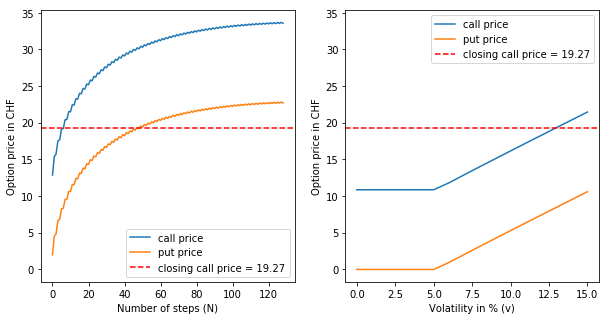

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

call_price_N = [binomial_call_pricer(num, S_0, v, r, X, t, q) for num in range(1,130)]
put_price_N = [binomial_put_pricer(num, S_0, v, r, X, t, q) for num in range (1,130)]

# set N to 1 step for simplicity as we will be observing the impact of varying levels of volatility v
N=1

call_price_v = [binomial_call_pricer(N, S_0, sigma, r, X, t, q) for sigma in np.arange(0.005,2*v+0.01,0.01)]
put_price_v = [binomial_put_pricer(N, S_0, sigma, r, X, t, q) for sigma in np.arange(0.005,2*v+0.01,0.01)]

fig=plt.figure(figsize = [10, 5])

ax1=fig.add_subplot(121);

ax1.plot(call_price_N, label="call price");
ax1.plot(put_price_N, label="put price");

plt.xlabel('Number of steps (N)');
plt.ylabel('Option price in CHF');

market_call_price_1 = plt.axhline(y=19.27, color='r', linestyle='--', label="closing call price = 19.27");

plt.legend(loc='lower right');

ax2=fig.add_subplot(122,sharey=ax1);

ax2.plot(call_price_v, label = "call price");
ax2.plot(put_price_v, label="put price");

plt.xlabel('Volatility in % (v)');
plt.ylabel('Option price in CHF');

market_call_price_2 = plt.axhline(y=19.27, color='r', linestyle='--', label="closing call price = 19.27");

plt.legend(loc='upper right');
    